**Nama    : Yohanes Hasintongan Manullang**

**NIM     : 4212201037**

**Kelas   : Teknik Mekatronika 5B-Pagi**


**Load Image With Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

train_data = pd.read_csv('/content/drive/My Drive/Dataset/emnist-bymerge-train.csv', nrows = 1000)

print("Train data shape:", train_data.shape)

Train data shape: (1000, 785)


**Divide Image and Label**

In [7]:
train_images = train_data.iloc[:,1:].values.reshape(-1,28,28).astype('float32')
train_labels = train_data.iloc[:,0].values.astype('int')

**HOG Feature Extraction**

In [10]:
from skimage.feature import hog
import numpy as np

In [12]:
train_features_array=[]
for images in train_images:
    features, _ = hog(images.reshape((28,28)),
                      orientations = 9,
                      pixels_per_cell = (8,8),
                      cells_per_block = (2,2),
                      visualize = True,
                      block_norm = 'L2')
    train_features_array.append(features)
train_features = np.array(train_features_array)

In [13]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [14]:
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)

**Classify Datasets with SVM**

In [15]:
from sklearn import svm

In [16]:
clf = svm.SVC()

**LOOCV Calculation**

In [17]:
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [20]:
cv = LeaveOneOut()
predicted_labels = cross_val_predict(clf, train_features_scaled, train_labels, cv=cv)

In [21]:
cv_confusion_matrix = confusion_matrix(train_labels, predicted_labels)
cv_accuracy = accuracy_score(train_labels, predicted_labels)
cv_precision = precision_score(train_labels, predicted_labels, average=None)
cv_recall = recall_score(train_labels, predicted_labels, average=None)
cv_f1 = f1_score(train_labels, predicted_labels, average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
print("LOOCV Results :")
print("Confusion Matrix :")
print(cv_confusion_matrix)
print("\nAccuracy :")
print(cv_accuracy)
print("\nPrecision:")
print(cv_precision)
print("\nRecall   :")
print(cv_recall)
print("\nF1 Score :")
print(cv_f1)

LOOCV Results :
Confusion Matrix :
[[41  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 16  1]
 [ 0  0  1 ...  0  0 16]]

Accuracy :
0.623

Precision:
[0.47126437 0.49019608 0.71232877 0.77777778 0.57333333 0.65217391
 0.59016393 0.8        0.53846154 0.83333333 0.         0.
 0.66666667 0.         0.         0.         0.         0.
 0.         1.         0.         0.34285714 0.70588235 0.
 0.55555556 0.6        0.         0.         0.78571429 1.
 0.56666667 0.         0.         0.         0.         0.
 0.71428571 0.28571429 1.         0.66037736 0.         0.
 0.625      1.         0.         0.76190476 0.55172414]

Recall   :
[0.70689655 0.90909091 0.92857143 0.875      0.84313725 0.71428571
 0.7826087  0.92857143 0.77777778 0.92105263 0.         0.
 0.15384615 0.         0.         0.         0.         0.
 0.         0.42857143 0.         0.32432432 0.70588235 0.
 0.54545455 0.375      0.         0.         

**Generate Matrix Figure for Confusion Matrix**

In [23]:
from mlxtend.plotting import plot_confusion_matrix

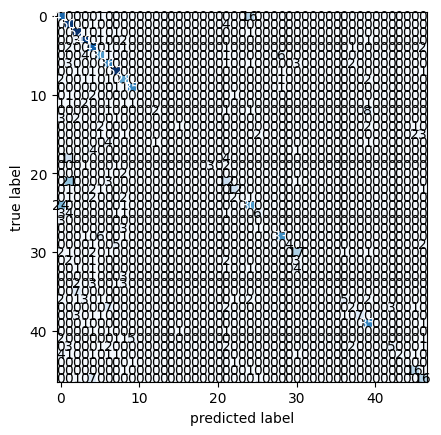

In [24]:
fig, ax = plot_confusion_matrix(conf_mat=cv_confusion_matrix)

**Comparison between Original Images and HOG Feature Images**

In [29]:
import matplotlib.pyplot as plt

In [30]:
def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28, 28)),
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         visualize=True,
                         block_norm='L2')
        hog_images.append(hog_img)
    return np.array(hog_images)

In [26]:
def plot_images_with_hog(images):
    hog_images = extract_hog_images(images)

    fig, axes = plt.subplots(2, 10, figsize=(15, 5))

    # Plot original images
    for i in range(min(len(images), 10)):
        axes[0, i].imshow(images[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    # Plot HOG images
    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

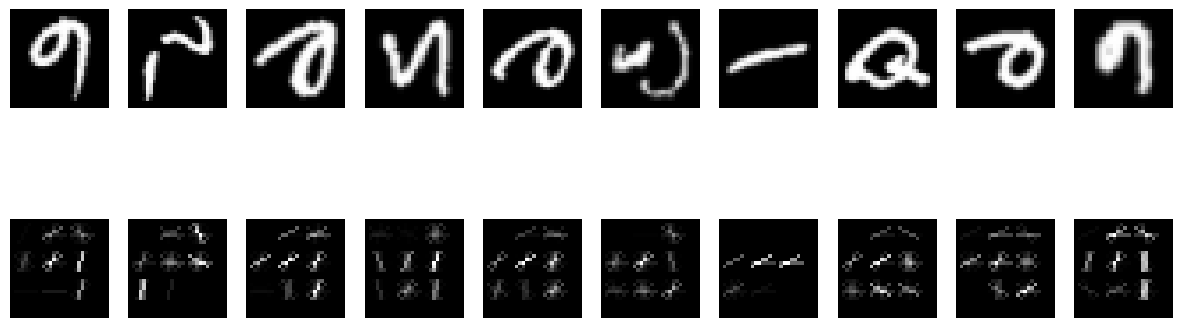

In [31]:
plot_images_with_hog(train_images)